# Binary Classification Model for Seismic Bumps Using Python Take 2
### David Lowe
### September 7, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. https://machinelearningmastery.com/

SUMMARY: The purpose of this project is to construct a prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The Seismic Bumps Data Set is a binary-class classification situation where we are trying to predict one of the two possible outcomes.

INTRODUCTION: Mining activity has always been connected with the occurrence of dangers which are commonly called mining hazards. A special case of such a threat is a seismic hazard which frequently occurs in many underground mines. Seismic hazard is the hardest detectable and predictable of natural hazards, and it is comparable to an earthquake. The complexity of seismic processes and big disproportion between the number of low-energy seismic events and the number of high-energy phenomena causes the statistical techniques to be insufficient to predict seismic hazard. Therefore, it is essential to search for new opportunities for better hazard prediction, also using machine learning methods.

In iteration Take1, we had three algorithms with high accuracy results but with dismal precision and recall scores. For this iteration, we will examine the viability of using the ROC scores to rank and choose the models.

CONCLUSION: The baseline performance of the eight algorithms achieved an average accuracy of 91.94%. Three algorithms (Logistic Regression, Support Vector Machine, and Stochastic Gradient Boosting) achieved the top three accuracy scores after the first round of modeling. After a series of tuning trials, the support vector machine algorithm turned in the best accuracy result of 93.36%, but with very low precision and recall scores for the positive cases when processing the validation dataset. With an imbalanced dataset we have on-hand, we needed to look for another metric or another approach to evaluate the models.

From the current iteration, the baseline performance of the eight algorithms achieved an average ROC score of 66.16%. Three algorithms (Logistic Regression, AdaBoost, and Stochastic Gradient Boosting) achieved the top three ROC scores after the first round of modeling. After a series of tuning trials, Stochastic Gradient Boosting turned in the best ROC result of 77.98%, but with a dismal precision and recall scores.

The ROC metric has given us a more viable way to evaluate the models, other than using the accuracy scores. However, with an imbalanced dataset we have on-hand, we still need to look for another approach to further validate our modeling effort.

Dataset Used: Seismic Bumps Data Set

Dataset ML Model: Binary classification with numerical and categorical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/seismic-bumps

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem
### 1.a) Load ibraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas import get_dummies
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime
import arff

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'seismic-bumps.arff'
arffData = arff.load(open(inputFile))
entireDataset = pd.DataFrame(arffData['data'])
entireDataset.columns = ['seismic','seismoacoustic','shift','genergy','gpuls','gdenergy','gdpuls','ghazard','nbumps',
                         'nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7','nbumps89','energy','maxenergy','targetVar']

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [3]:
# Set up one seed number to be used throughout the script
seedNum = 777

# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [4]:
set_option('display.width', 100)
print(entireDataset.head(20))

   seismic seismoacoustic shift   genergy  gpuls  gdenergy  gdpuls ghazard  nbumps  nbumps2  \
0        a              a     N   15180.0   48.0     -72.0   -72.0       a     0.0      0.0   
1        a              a     N   14720.0   33.0     -70.0   -79.0       a     1.0      0.0   
2        a              a     N    8050.0   30.0     -81.0   -78.0       a     0.0      0.0   
3        a              a     N   28820.0  171.0     -23.0    40.0       a     1.0      0.0   
4        a              a     N   12640.0   57.0     -63.0   -52.0       a     0.0      0.0   
5        a              a     W   63760.0  195.0     -73.0   -65.0       a     0.0      0.0   
6        a              a     W  207930.0  614.0      -6.0    18.0       a     2.0      2.0   
7        a              a     N   48990.0  194.0     -27.0    -3.0       a     1.0      0.0   
8        a              a     N  100190.0  303.0      54.0    52.0       a     0.0      0.0   
9        a              a     W  247620.0  675.0  

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(2584, 19)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

seismic            object
seismoacoustic     object
shift              object
genergy           float64
gpuls             float64
gdenergy          float64
gdpuls            float64
ghazard            object
nbumps            float64
nbumps2           float64
nbumps3           float64
nbumps4           float64
nbumps5           float64
nbumps6           float64
nbumps7           float64
nbumps89          float64
energy            float64
maxenergy         float64
targetVar          object
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

            genergy        gpuls     gdenergy       gdpuls       nbumps      nbumps2      nbumps3  \
count  2.584000e+03  2584.000000  2584.000000  2584.000000  2584.000000  2584.000000  2584.000000   
mean   9.024252e+04   538.579334    12.375774     4.508901     0.859520     0.393576     0.392802   
std    2.292005e+05   562.652536    80.319051    63.166556     1.364616     0.783772     0.769710   
min    1.000000e+02     2.000000   -96.000000   -96.000000     0.000000     0.000000     0.000000   
25%    1.166000e+04   190.000000   -37.000000   -36.000000     0.000000     0.000000     0.000000   
50%    2.548500e+04   379.000000    -6.000000    -6.000000     0.000000     0.000000     0.000000   
75%    5.283250e+04   669.000000    38.000000    30.250000     1.000000     1.000000     1.000000   
max    2.595650e+06  4518.000000  1245.000000   838.000000     9.000000     8.000000     7.000000   

           nbumps4      nbumps5  nbumps6  nbumps7  nbumps89         energy      maxenergy 

#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
print(entireDataset.groupby('targetVar').size())

targetVar
0    2414
1     170
dtype: int64


#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
targetVar         0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

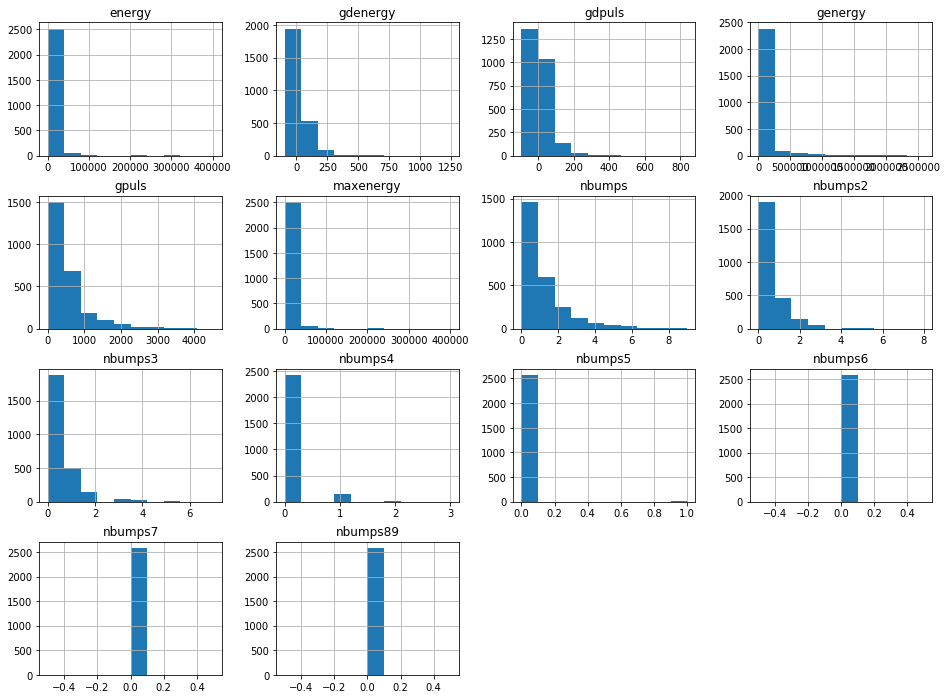

In [11]:
# Histograms for each attribute
entireDataset.hist()
pyplot.show()

In [12]:
# Density plot for each attribute
#entireDataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
#pyplot.show()

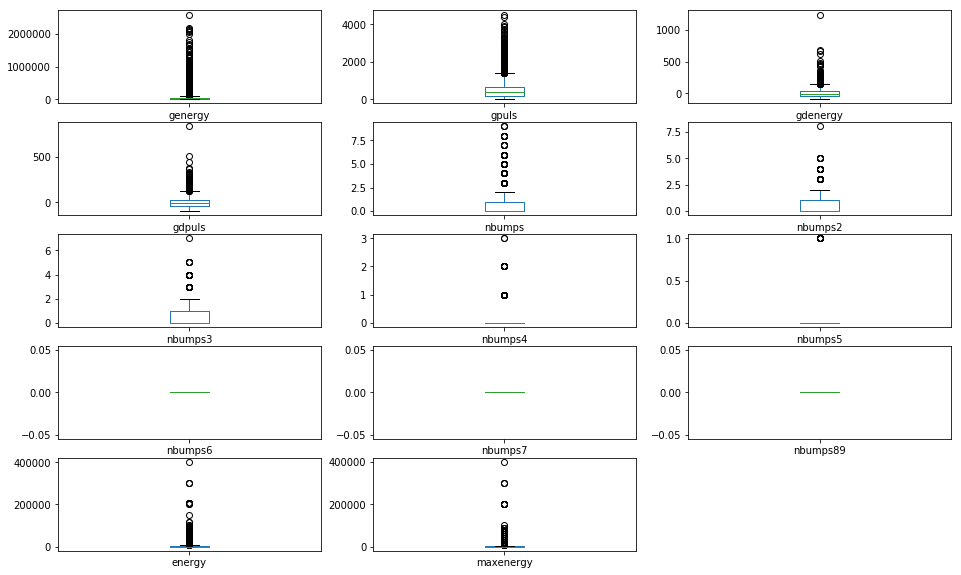

In [13]:
# Box and Whisker plot for each attribute
entireDataset.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

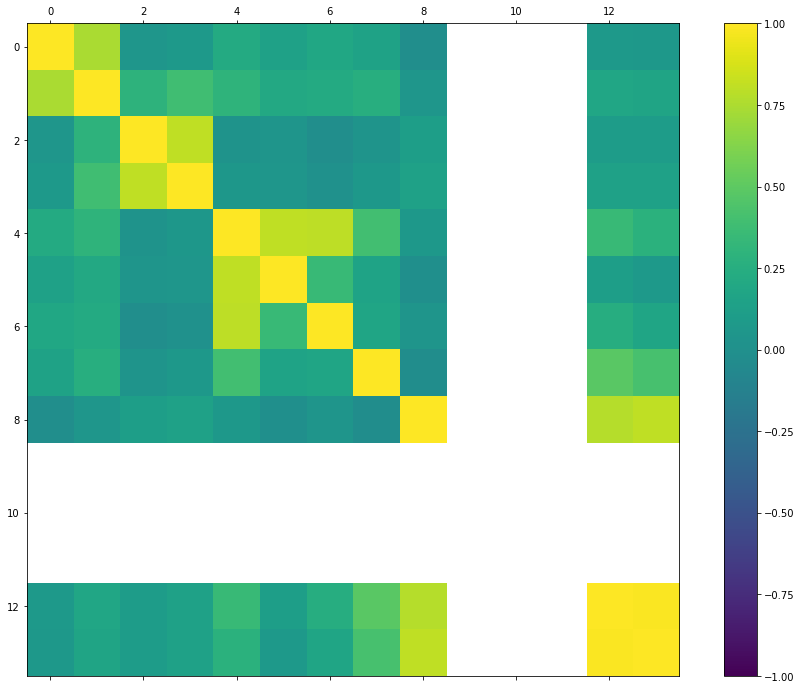

In [14]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

C:\Users\david.lowe\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\david.lowe\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


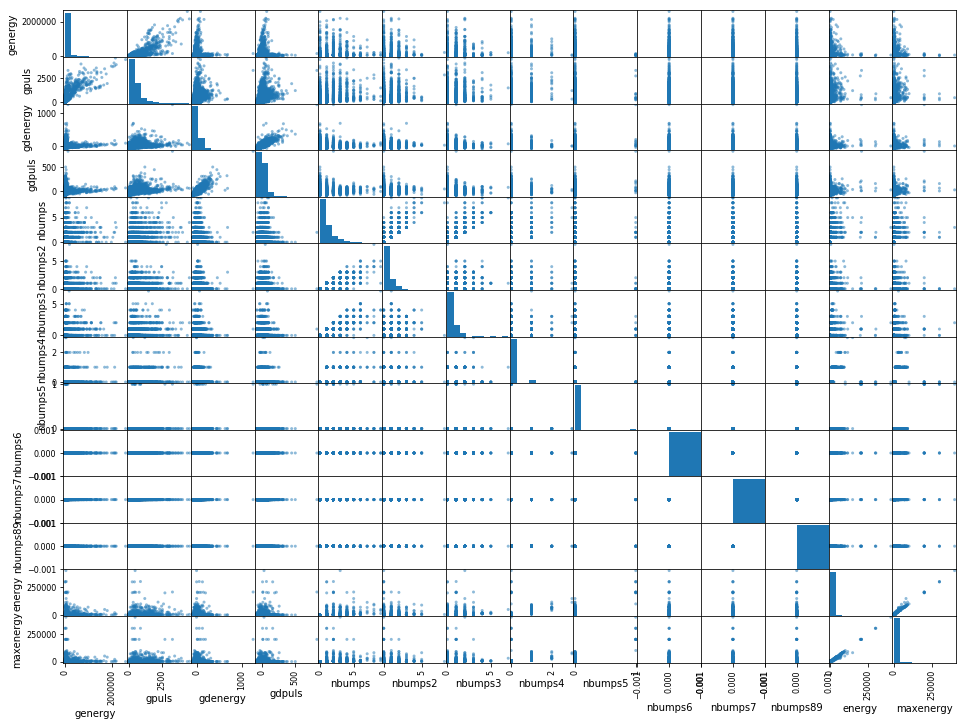

In [15]:
# Scatterplot matrix
scatter_matrix(entireDataset)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [16]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [17]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [18]:
# Convert the string variables into categorical variables as appropriate
entireDataset["seismic"] = entireDataset["seismic"].astype('category')
entireDataset["seismoacoustic"] = entireDataset["seismoacoustic"].astype('category')
entireDataset["shift"] = entireDataset["shift"].astype('category')
entireDataset["ghazard"] = entireDataset["ghazard"].astype('category')

In [19]:
# Apply the One-Hot-Encoding (dummy variables handling) technique
entireDataset_dummies = get_dummies(entireDataset)
entireDataset_dummies['targetVar'] = entireDataset_dummies['targetVar_1']
entireDataset_dummies.pop('targetVar_0')
entireDataset_dummies.pop('targetVar_1')
print(entireDataset_dummies.dtypes)

genergy             float64
gpuls               float64
gdenergy            float64
gdpuls              float64
nbumps              float64
nbumps2             float64
nbumps3             float64
nbumps4             float64
nbumps5             float64
nbumps6             float64
nbumps7             float64
nbumps89            float64
energy              float64
maxenergy           float64
seismic_a             uint8
seismic_b             uint8
seismoacoustic_a      uint8
seismoacoustic_b      uint8
seismoacoustic_c      uint8
shift_N               uint8
shift_W               uint8
ghazard_a             uint8
ghazard_b             uint8
ghazard_c             uint8
targetVar             uint8
dtype: object


In [20]:
print(entireDataset_dummies.head())

   genergy  gpuls  gdenergy  gdpuls  nbumps  nbumps2  nbumps3  nbumps4  nbumps5  nbumps6  \
0  15180.0   48.0     -72.0   -72.0     0.0      0.0      0.0      0.0      0.0      0.0   
1  14720.0   33.0     -70.0   -79.0     1.0      0.0      1.0      0.0      0.0      0.0   
2   8050.0   30.0     -81.0   -78.0     0.0      0.0      0.0      0.0      0.0      0.0   
3  28820.0  171.0     -23.0    40.0     1.0      0.0      1.0      0.0      0.0      0.0   
4  12640.0   57.0     -63.0   -52.0     0.0      0.0      0.0      0.0      0.0      0.0   

     ...      seismic_b  seismoacoustic_a  seismoacoustic_b  seismoacoustic_c  shift_N  shift_W  \
0    ...              0                 1                 0                 0        1        0   
1    ...              0                 1                 0                 0        1        0   
2    ...              0                 1                 0                 0        1        0   
3    ...              0                 1          

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [21]:
totAttr = len(entireDataset_dummies.columns)-1
array = entireDataset_dummies.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
print(Y_entire)
validation_size = 0.30
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

[0. 0. 0. ... 0. 0. 0.]
X_entire.shape: (2584, 24) Y_entire.shape: (2584,)
X_train.shape: (1808, 24) Y_train.shape: (1808,)
X_validation.shape: (776, 24) Y_validation.shape: (776,)
Total time for data handling and visualization: 0:00:13.177443


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Logistic Regression

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged CART, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [22]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'roc_auc'

In [23]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [24]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

LR: 0.753208 (0.105963)
Model training time: 0:00:00.276857
CART: 0.543568 (0.060286)
Model training time: 0:00:00.079938
NB: 0.682769 (0.137312)
Model training time: 0:00:00.022985
KNN: 0.641827 (0.072345)
Model training time: 0:00:00.048972
SVM: 0.512766 (0.004701)
Model training time: 0:00:02.516557
BT: 0.645773 (0.112806)
Model training time: 0:00:00.516722
RF: 0.683545 (0.116334)
Model training time: 0:00:00.204866
ET: 0.651746 (0.115644)
Model training time: 0:00:00.188890
AB: 0.729801 (0.120135)
Model training time: 0:00:01.107383
GBM: 0.771990 (0.097201)
Model training time: 0:00:01.582075
Average metrics (roc_auc) from all models: 0.6616993359433692


### 4.b) Spot-checking baseline algorithms

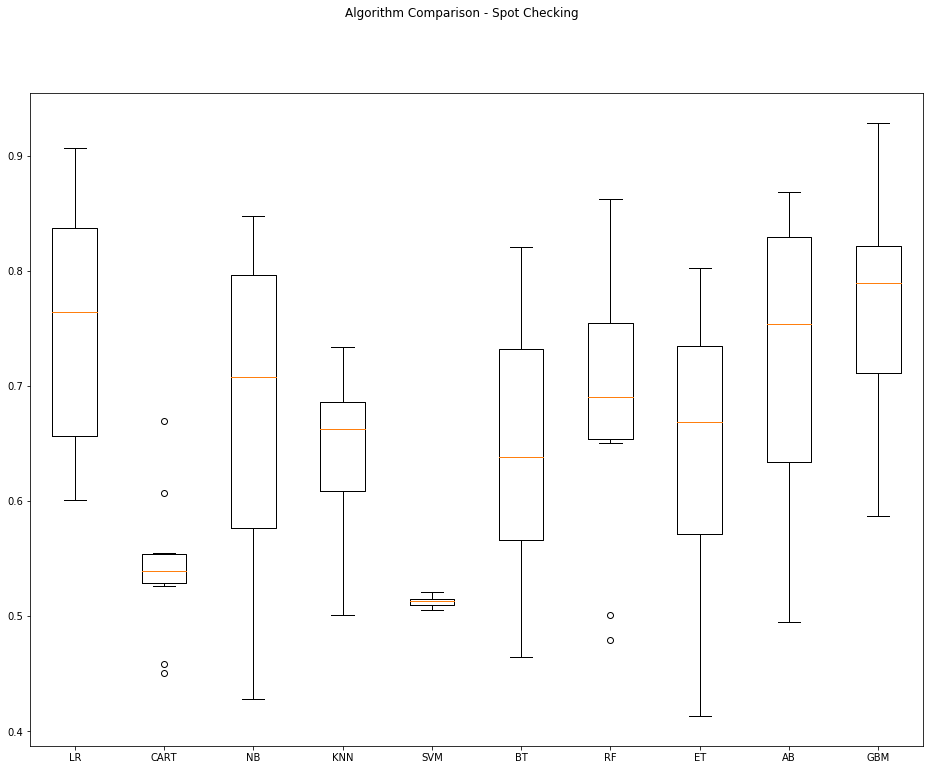

In [25]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [26]:
# Set up the comparison array
results = []
names = []

In [27]:
# Tuning algorithm #1 - Logistic Regression
# Logistic Regression does not require any special tuning parameters
startTimeModule = datetime.now()
model1 = LogisticRegression(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_result1 = cross_val_score(model1, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_result1)
names.append('LR')
print("Best: %f" % (cv_result1.mean()))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.753208
Model training time: 0:00:00.278858


In [28]:
# Tuning algorithm #2 - AdaBoost
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([10,25,50,75,100]))
model2 = AdaBoostClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('ADA')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.755618 using {'n_estimators': 10}
0.755618 (0.110023) with: {'n_estimators': 10}
0.749019 (0.113072) with: {'n_estimators': 25}
0.729883 (0.120057) with: {'n_estimators': 50}
0.726967 (0.119447) with: {'n_estimators': 75}
0.721276 (0.116324) with: {'n_estimators': 100}
Model training time: 0:00:06.380341


In [29]:
# Tuning algorithm #3 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=np.array([10,25,50,75,100]))
model3 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.779835 using {'n_estimators': 50}
0.774880 (0.101372) with: {'n_estimators': 10}
0.775495 (0.117712) with: {'n_estimators': 25}
0.779835 (0.112097) with: {'n_estimators': 50}
0.775760 (0.103882) with: {'n_estimators': 75}
0.772044 (0.097216) with: {'n_estimators': 100}
Model training time: 0:00:04.389483


### 5.b) Compare Algorithms After Tuning

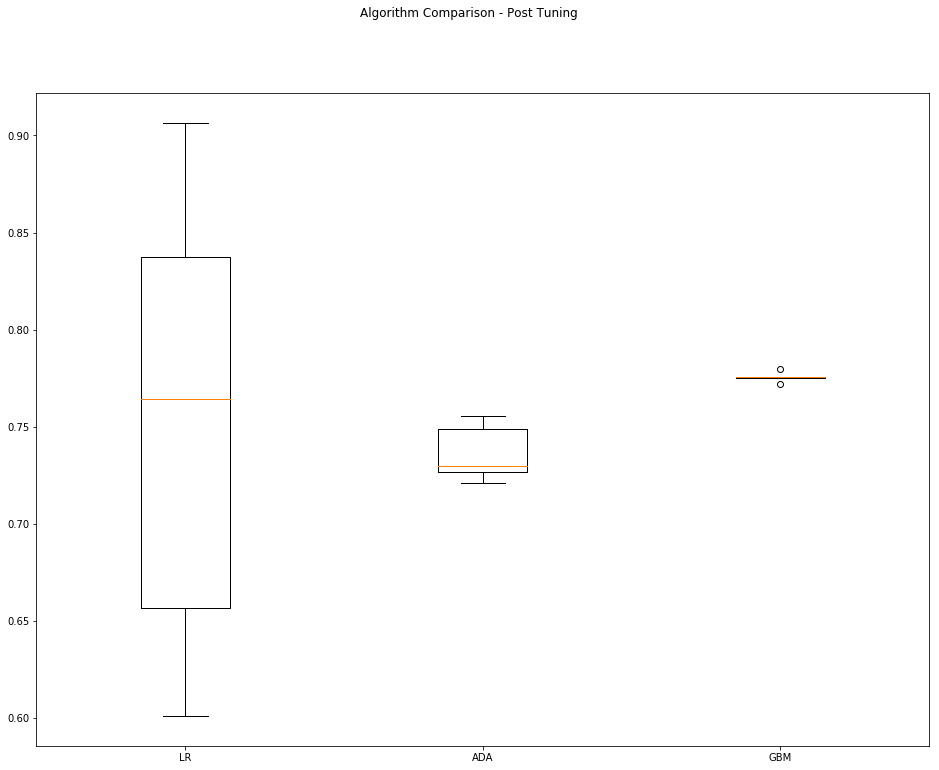

In [30]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [31]:
model = GradientBoostingClassifier(n_estimators=50,random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9278350515463918
[[720   6]
 [ 50   0]]
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96       726
        1.0       0.00      0.00      0.00        50

avg / total       0.87      0.93      0.90       776



### 6.b) Create standalone model on entire training dataset

In [32]:
startTimeModule = datetime.now()
finalModel = GradientBoostingClassifier(n_estimators=50,random_state=seedNum)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.117931


### 6.c) Save model for later use

In [33]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:00:31.599876
